In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
from sklearn.mixture import GaussianMixture

In [2]:
df = pd.read_csv('./codeml-challenge1/train.csv')

In [3]:
df.head()

,id,x,y,z,luminosity,mass,helium_ppm
0,0,-71.007375,100.774323,-8.198832,67.562893,2548.034961,212353.541019
1,1,-74.925552,91.874221,-25.823766,50.584089,633.776097,227226.007527
2,2,-100.302987,64.899237,-71.434851,50.786286,793.732911,240853.217456
3,3,-52.174400,55.024314,-24.166729,32.247787,921.451802,251411.349973
4,4,35.268677,-17.670359,67.339614,57.656351,1773.264514,229077.364655


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          1000 non-null   int64  
 1   x           1000 non-null   float64
 2   y           1000 non-null   float64
 3   z           1000 non-null   float64
 4   luminosity  1000 non-null   float64
 5   mass        1000 non-null   float64
 6   helium_ppm  1000 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 54.8 KB


In [5]:
df.describe()

,id,x,y,z,luminosity,mass,helium_ppm
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,-7.058864,6.066592,12.193857,39.453575,970.687249,239511.832989
std,288.819436,49.241944,55.945002,59.175234,29.771364,942.797736,13830.787944
min,0.000000,-100.302987,-101.630165,-123.953059,0.101355,0.634248,198596.945694
25%,249.750000,-46.458804,-40.044415,-32.925600,15.004428,309.585132,229073.415198
50%,499.500000,-6.145698,5.541455,12.132695,33.222631,665.498533,239586.759928
75%,749.250000,31.103954,50.947960,57.716125,57.748896,1352.623313,249639.060533
max,999.000000,89.821312,114.926626,151.185988,174.593847,6344.531998,282693.103742


                  id         x         y         z  luminosity      mass  \
id          1.000000  0.025973  0.002025  0.034241    0.022128  0.007310   
x           0.025973  1.000000 -0.595487  0.749383   -0.025646  0.016843   
y           0.002025 -0.595487  1.000000  0.066156    0.047803 -0.030708   
z           0.034241  0.749383  0.066156  1.000000    0.010802  0.007233   
luminosity  0.022128 -0.025646  0.047803  0.010802    1.000000 -0.001993   
mass        0.007310  0.016843 -0.030708  0.007233   -0.001993  1.000000   
helium_ppm  0.075302  0.179373 -0.258277  0.019399   -0.025082 -0.003145   

            helium_ppm  
id            0.075302  
x             0.179373  
y            -0.258277  
z             0.019399  
luminosity   -0.025082  
mass         -0.003145  
helium_ppm    1.000000  


<AxesSubplot:>

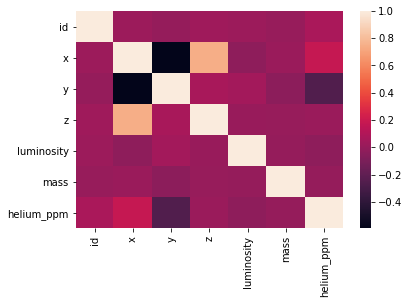

In [6]:
corr = df.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In [7]:
# Min-max normalization
def normalize(df, feature_name):
    max_value = df[feature_name].max()
    min_value = df[feature_name].min()
    df[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return df

In [8]:
df_scaled = normalize(df, 'luminosity')
df_scaled = normalize(df_scaled, 'mass')
df_scaled = normalize(df_scaled, 'helium_ppm')

In [9]:
df_scaled.head()

,id,x,y,z,luminosity,mass,helium_ppm
0,0,-71.007375,100.774323,-8.198832,0.386616,0.401551,0.163582
1,1,-74.925552,91.874221,-25.823766,0.289312,0.099803,0.340432
2,2,-100.302987,64.899237,-71.434851,0.290471,0.125018,0.502476
3,3,-52.174400,55.024314,-24.166729,0.184228,0.145150,0.628024
4,4,35.268677,-17.670359,67.339614,0.329842,0.279423,0.362447


In [10]:
#Convert position to unit vector
magnitude = []
X = np.array(df_scaled['x'])
Y = np.array(df_scaled['y'])
Z = np.array(df_scaled['z'])
magnitude = X**2 + Y **2 + Z**2
magnitude = np.sqrt(magnitude)

In [11]:
magnitude[0] == np.sqrt(X[0]**2 + Y[0]**2 + Z[0]**2)

True

In [12]:
scaled_x = np.divide(X, magnitude )
scaled_y = np.divide(Y, magnitude )
scaled_z = np.divide(Z, magnitude )

In [13]:
#Check your calculations
print(X[0], Y[0], Z[0], magnitude[0], 
      X[0]/magnitude[0], Y[0]/magnitude[0], Z[0]/magnitude[0], 
      scaled_x[0], scaled_y[0], scaled_z[0])

-71.0073750620932 100.77432272706145 -8.198831554838947 123.55052518371313 -0.5747233769869369 0.8156527265037143 -0.06636015138460735 -0.5747233769869369 0.8156527265037143 -0.06636015138460735


In [14]:
df_scaled['x'] = scaled_x
df_scaled['y'] = scaled_y
df_scaled['z'] = scaled_z

In [15]:
df_scaled.head()

,id,x,y,z,luminosity,mass,helium_ppm
0,0,-0.574723,0.815653,-0.066360,0.386616,0.401551,0.163582
1,1,-0.617522,0.757210,-0.212835,0.289312,0.099803,0.340432
2,2,-0.720588,0.466243,-0.513196,0.290471,0.125018,0.502476
3,3,-0.655576,0.691385,-0.303657,0.184228,0.145150,0.628024
4,4,0.451912,-0.226418,0.862850,0.329842,0.279423,0.362447


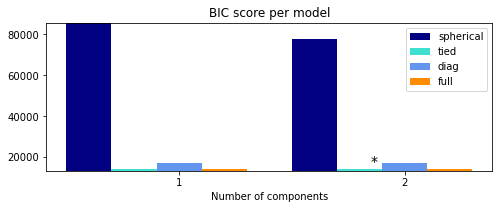

In [16]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 3)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(df_scaled)
        bic.append(gmm.bic(df_scaled))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)
'''
# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)
'''

plt.show()

In [17]:
clf

GaussianMixture(covariance_type='tied', n_components=2)

In [18]:
Y = clf.predict(df_scaled)

In [19]:
Y[69], Y[420] #Should be distinct

(1, 1)

In [20]:
#Try K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_scaled)
Y = kmeans.labels_

In [21]:
Y[69], Y[420] #Should be distinct

(0, 0)

In [22]:
#Flip the ids
constel_id = []
for c_id in Y:
    if(c_id == 1):
        constel_id.append(0)
    else:
        constel_id.append(1)

In [23]:
df_predict = pd.DataFrame(constel_id)

In [24]:
df_predict.head()

,0
0,1
1,1
2,1
3,1
4,1


In [25]:
df_predict.to_csv('./codeml-challenge1/submission3.csv')